In [4]:
#calculate dpa through SRIM simulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 


/usr/lib/python3/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


0     0.343689
1     0.366961
2     0.397418
3     0.420378
4     0.436167
5     0.444227
6     0.457665
7     0.465339
8     0.488127
9     0.475895
10    0.484583
11    0.485530
12    0.480712
13    0.468030
14    0.441505
15    0.421891
16    0.400695
17    0.362562
18    0.332262
19    0.295030
20    0.261204
21    0.228158
22    0.197593
23    0.158269
24    0.129950
Name: dpa, dtype: float64

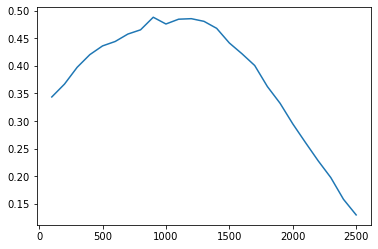

In [22]:
path='/Users/ruhe/Desktop/ga2o3/SRIM_dpa'
path='/home/heruhe/Desktop/Ga2o3/combine_cells/SRIM/quick_calculation'
fn=path+'/VACANCY.txt'
# Read the CSV file with specified parameters
v = pd.read_csv(fn, skiprows=28, nrows=100, sep='  ', names=['depth', 'V1', 'V2'],header=None)
flunce=2*10**14
atom_density=9.45*10**22
v['dpa']=(v['V1']+v['V2'])*flunce/atom_density*10**8
plt.plot(v['depth'][0:25],v['dpa'][0:25])
v['dpa'].iloc[:25]

In [6]:

#function to calculate displacements-per-atom (dpa)
def DPA(E,npka,estop,n,TDE):
    #input E:recoil energy
    #npka:cascade times
    #estop:electronic stopping power,obtained by lammps logfile output stable 'f_elstop'
    #n:number of atoms
    #TDE: lattice dis-placement energy
    #output: dpa value
    Td=E-estop
    return npka*0.8*Td/(2*TDE*n)
TDEO1=17.44
TDEO2=17.38
TDEO3=17.07
TDEGa1=22.91
TDEGa2=20.04
mO=15.9994
mGa=69.72
TDEga2o3=((TDEO1+TDEO2+TDEO3)*mO+(TDEGa1+TDEGa2)*mGa)/(2*mGa+3*mO)
print((TDEGa1+TDEGa2)/2,(TDEO1+TDEO2+TDEO3)/3)

21.475 17.296666666666667


In [16]:
DPA(1500,10,193.294,81920,TDEga2o3)

0.0031268756296879514

In [40]:
pkal=np.zeros(25)
i=0
for dpa in v['dpa'].iloc[:25]:

    for pka in range(0,2001,10):
        c_dpa=DPA(1500,pka,193.294,81920,TDEga2o3)
        if np.abs(c_dpa-dpa)<=0.002:
            print(pka)
            pkal[i]=pka
            i+=1
            break

print(pkal)


1100
1170
1270
1340
1390
1420
1460
1490
1560
1520
1550
1550
1540
1500
1410
1350
1280
1160
1060
940
830
730
630
500
410
[1100. 1170. 1270. 1340. 1390. 1420. 1460. 1490. 1560. 1520. 1550. 1550.
 1540. 1500. 1410. 1350. 1280. 1160. 1060.  940.  830.  730.  630.  500.
  410.]


In [ ]:
for i in 1100. 1170. 1270. 1340. 1390. 1420. 1460. 1490. 1560. 1520. 1550. 1550. 1540. 1500. 1410. 1350. 1280. 1160. 1060.  940.  830.  730.  630.  500. 410
do                                             
  scp -r heru1111@mahti.csc.fi:/scratch/djurabek/heru/ga2o3/overlapping/cascade_anneal/small1500ev/out/data.lastframe-"$i" .
done                                        

